# Webscrapping Part. II

In [1]:
# pip install webdriver-manager
# pip install selenium

## Library
import csv
import time
import random
import codecs
import sys

from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager


## Options en tout genre
# fonction pause
def pause():
    time_break = random.randint(1,2)
    return time.sleep(time_break)
 
 
# options
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
capa = DesiredCapabilities.CHROME
capa["pageLoadStrategy"] = "none"
pause()


## On allume le driver
s=Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s, chrome_options=options)
driver.maximize_window()
driver.get('https://www.google.com')
wait = WebDriverWait(driver, 30)


début = "https://www.senscritique.com/liste/Recapitulatif_des_films_vus_en_2021/2914300#page-"

for i in range(13):
    x = début + str(i + 1)
    
# aller sur senscritique
    driver.get(x)

    if i == 0:
        print("Ok let's go !!")
    elif i > 0 and i < 13:
        print("Page suivante !")
    elif i == 13:
        print("Dernière page !")
        
    pause() #Pour lui laisser le temps de changer de pages au cas où
 

    if i == 0:
        pause()
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[mode='primary']"))).click() #Pour cliquer sur le bouton des cookies lors de la première page d'ouverture
        pause()

# ouvrir csv
    with codecs.open('Page_test'+str((f"{i+1:02d}"))+'.csv', 'w', encoding="utf-8") as csvfile: # (f"{i+1:02d}") pour avoir 01 au lieu de 1
        fieldnames = ['Titre', 'Director', 'Date_internationale', 'Date_fr', 'Ma_Note', 'Moyenne_globale', 'Multiples_info', 'Lien']
 
        writer = csv.DictWriter(csvfile, delimiter='$', lineterminator='\n', fieldnames=fieldnames)
        writer.writeheader()
 
    # prendre infos
        items = driver.find_elements_by_css_selector("li.elli-item")
 
    # boucle
        for item in items:
 
        # scroll smoothly
            driver.execute_script(
                "arguments[0].scrollIntoView({behavior: 'smooth', block: 'center', inline: 'nearest'});",
                item)
 
        # title
            try:
                title = item.find_element_by_css_selector("a.elco-anchor").text
            except NoSuchElementException:
                title = ''
                pass
 
        # realisateur
            try:
                director = item.find_element_by_css_selector("a.elco-baseline-a").text
            except NoSuchElementException:
                director = ''
                pass
 
        # date internationale
            try:
                date_i = item.find_element_by_css_selector("span.elco-date").text
            except NoSuchElementException:
                date_i = ''
                pass

        # date française
            try:
                date_f = item.find_element_by_css_selector('p.elco-baseline.elco-options time').get_attribute('datetime')
            except NoSuchElementException:
                date_f = ''
                pass
        
        # ma note
            try:
                gradePersonal = item.find_element_by_css_selector("span.elrua-useraction-inner.only-child").text
            except NoSuchElementException:
                gradePersonal = ''
                pass

         # moyenne
            try:
                gradeMean = item.find_element_by_css_selector("a.erra-global").text
            except NoSuchElementException:
                gradeMean = ''
                pass

         # durée / date fr / genre : à ranger après
            try:
                bloc_tri = item.find_element_by_css_selector("p.elco-baseline.elco-options").text
            except NoSuchElementException:
                bloc_tri = ''
                pass

         # lien
            try:
                lien = item.find_element_by_css_selector('h3.d-heading2.elco-title a').get_attribute('href')
            except NoSuchElementException:
                lien = ''
                pass
            
        # write csv
            writer.writerow({'Titre': title, 'Director': director, 'Date_internationale': date_i, 'Date_fr': date_f, 'Ma_Note': gradePersonal, 'Moyenne_globale': gradeMean, 'Multiples_info':bloc_tri, 'Lien':lien})
 
            print("-- SUCCESS %s --" % title)


# end
print("Bravo !")
driver.close()




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Hosti\.wdm\drivers\chromedriver\win32\96.0.4664.45]
<ipython-input-1-3c4a91187569>:38: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(service=s, chrome_options=options)


Ok let's go !!


<ipython-input-1-3c4a91187569>:75: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  items = driver.find_elements_by_css_selector("li.elli-item")
D:\Anaconda\lib\site-packages\selenium\webdriver\remote\webelement.py:484: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


-- SUCCESS 8 femmes --
-- SUCCESS En avant --
-- SUCCESS La Mort vous va si bien --
-- SUCCESS Muse --
-- SUCCESS Big Eyes --
-- SUCCESS Made in China --
-- SUCCESS Sans identité --
-- SUCCESS La Cabane dans les bois --
-- SUCCESS Le Bruit des glaçons --
-- SUCCESS 100 % bio --
-- SUCCESS Les Garçons et Guillaume, à table ! --
-- SUCCESS American Graffiti --
-- SUCCESS Joyeuse retraite ! --
-- SUCCESS C'est quoi cette mamie ?! --
-- SUCCESS Yummy --
-- SUCCESS L'Exercice de l'État --
-- SUCCESS Jungle --
-- SUCCESS The Wrestler --
-- SUCCESS Coherence --
-- SUCCESS Why Don't You Play in Hell? --
-- SUCCESS Tunnel --
-- SUCCESS Black Snake, la légende du serpent noir --
-- SUCCESS Premier de la classe --
-- SUCCESS Christ(off) --
-- SUCCESS VFW --
-- SUCCESS The Fundamentals of Caring --
-- SUCCESS Un air de famille --
-- SUCCESS Headhunters --
-- SUCCESS Une femme de ménage --
-- SUCCESS Retour à Zombieland --
Page suivante !
-- SUCCESS Le Sens de la fête --
-- SUCCESS Alien vs. Predat

-- SUCCESS Ring --
-- SUCCESS Carrie au bal du diable --
-- SUCCESS Detour --
Page suivante !
-- SUCCESS Le monde est à toi --
-- SUCCESS 8MM - Huit millimètres --
-- SUCCESS Les Apparences --
-- SUCCESS The Lighthouse --
-- SUCCESS Dune --
-- SUCCESS Yves --
-- SUCCESS Riders of Justice --
-- SUCCESS Lamb --
-- SUCCESS Prisoners of the Ghostland --
-- SUCCESS Antebellum --
-- SUCCESS Crash --
-- SUCCESS The Room --
-- SUCCESS Le Convoyeur --
-- SUCCESS Sorry We Missed You --
-- SUCCESS The Assistant --
-- SUCCESS SuperGrave --
-- SUCCESS Shang-Chi et la Légende des Dix Anneaux --
-- SUCCESS The Guilty --
-- SUCCESS Game Night --
-- SUCCESS Les Clowns tueurs venus d'ailleurs --
-- SUCCESS Invasion --
-- SUCCESS Boîte noire --
-- SUCCESS Mon chien Stupide --
-- SUCCESS Beetlejuice --
-- SUCCESS GoldenEye --
-- SUCCESS Demain ne meurt jamais --
-- SUCCESS Mortal Kombat --
-- SUCCESS The Witch --
-- SUCCESS Un pays qui se tient sage --
-- SUCCESS Le Mystère Henri Pick --
Page suivante !
-

# Ou alors via CMD -> se mettre repertoire D et dossier Webscrapping puis "python Braveheart.py"

In [49]:
# Library
import pandas as pd
import glob

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
path = r'D:\Webscrapping' #Chemin des excels crés lors du scrapping via le CMD !!!
all_files = glob.glob(path + "/*.csv")

liste = []

for filename in all_files:
    df = pd.read_csv(filename, sep='$', index_col=None, header=0)
    liste.append(df)

Pages = pd.concat(liste, axis=0, ignore_index=True)


Pages["Date_internationale"] = Pages["Date_internationale"].str.replace(r")","").str.strip()
Pages["Date_internationale"] = Pages["Date_internationale"].str.replace(r"(","").str.strip()

Pages["Date_internationale"] = Pages["Date_internationale"].astype(int)

Pages

,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien
0,8 femmes,François Ozon,2002,2002-02-06,6,6,1 h 51 min. 6 février 2002 (France). Comédie m...,https://www.senscritique.com/film/8_femmes/380661
1,En avant,Dan Scanlon,2020,2020-03-04,7,7,"1 h 42 min. 4 mars 2020 (France). Animation, c...",https://www.senscritique.com/film/En_avant/261...
2,La Mort vous va si bien,Robert Zemeckis,1992,1992-12-23,7,7,1 h 44 min. 23 décembre 1992 (France). Comédie...,https://www.senscritique.com/film/La_Mort_vous...
3,Muse,Jaume Balagueró,2017,2017-11-29,5,5,1 h 47 min. 29 novembre 2017 (France). Épouvan...,https://www.senscritique.com/film/Muse/24659867
4,Big Eyes,Tim Burton,2014,2015-03-18,7,6,1 h 46 min. 18 mars 2015 (France). Biopic et d...,https://www.senscritique.com/film/Big_Eyes/456451
...,...,...,...,...,...,...,...,...
377,Luca,Enrico Casarosa,2021,2021-06-18,7,7,"1 h 41 min. 18 juin 2021 (France). Animation, ...",https://www.senscritique.com/film/Luca/42701894
378,Toy Story,John Lasseter,1995,1996-03-27,8,8,1 h 21 min. 27 mars 1996 (France). Comédie et ...,https://www.senscritique.com/film/Toy_Story/12...
379,Toy Story 2,John Lasseter,1999,2000-02-02,8,7,"1 h 32 min. 2 février 2000 (France). Aventure,...",https://www.senscritique.com/film/Toy_Story_2/...
380,Furie,Olivier Abbou,2019,2019-11-06,4,6,1 h 37 min. 6 novembre 2019 (France). Thriller...,https://www.senscritique.com/film/Furie/39013423


In [64]:
# Colonnes en bazar
Pages[['Temps', 'Date_fr2', 'Genre']] = Pages['Multiples_info'].str.split('.', 2, expand=True)
Pages

Pages['Temps'] = Pages['Temps'].str.replace(' ', '') # On enlève les espaces
Pages

Pages['Heure'] = Pages['Temps'].astype(str).str[0] # heures
Pages['Minutes'] = Pages['Temps'].astype(str).str[2:4] # minutes
Pages['Minutes']

Pages['Heure_min'] = Pages['Heure'].astype(int)*60 # heures en minutes
Pages['Heure_min']

Pages['Minutes'] = pd.to_numeric(Pages['Minutes'])
Pages['Temps'] = Pages['Heure_min'] + Pages['Minutes']
Pages['Temps']

#Pages = Pages.drop('Heure', 1)
#Pages = Pages.drop('Minutes', 1)
#Pages = Pages.drop('Heure_min', 1)

#pd.options.display.float_format = '{:,.0f}'.format
Pages[:5] # On obtient le temps en minutes du film, la date_fr2 (à suppr) et mes genres (qu'on utilisera pas pour l'instant)

,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien,Temps,Date_fr2,Genre,Heure,Minutes,Heure_min
0,8 femmes,François Ozon,2002,2002-02-06,6,6,1 h 51 min. 6 février 2002 (France). Comédie m...,https://www.senscritique.com/film/8_femmes/380661,111,6 février 2002 (France),"Comédie musicale, comédie et policier.",1,51,60
1,En avant,Dan Scanlon,2020,2020-03-04,7,7,"1 h 42 min. 4 mars 2020 (France). Animation, c...",https://www.senscritique.com/film/En_avant/261...,102,4 mars 2020 (France),"Animation, comédie, aventure, fantastique et ...",1,42,60
2,La Mort vous va si bien,Robert Zemeckis,1992,1992-12-23,7,7,1 h 44 min. 23 décembre 1992 (France). Comédie...,https://www.senscritique.com/film/La_Mort_vous...,104,23 décembre 1992 (France),Comédie et fantastique.,1,44,60
3,Muse,Jaume Balagueró,2017,2017-11-29,5,5,1 h 47 min. 29 novembre 2017 (France). Épouvan...,https://www.senscritique.com/film/Muse/24659867,107,29 novembre 2017 (France),"Épouvante-Horreur, science-fiction et thriller.",1,47,60
4,Big Eyes,Tim Burton,2014,2015-03-18,7,6,1 h 46 min. 18 mars 2015 (France). Biopic et d...,https://www.senscritique.com/film/Big_Eyes/456451,106,18 mars 2015 (France),Biopic et drame.,1,46,60


In [74]:
# Création nouvelles colonnes

Pages[['Year', 'Month', 'Day']] = Pages['Date_fr'].str.split('-', 2, expand=True)
Pages

del Pages['Month']
del Pages['Day']

Pages["Year"]

0      2002
1      2020
2      1992
3      2017
4      2015
       ... 
377    2021
378    1996
379    2000
380    2019
381    2010
Name: Year, Length: 382, dtype: object

# Contrôle des NA

In [75]:
Pages.isnull().sum() #NA ? Oui 3 Date FR manque car mal intégrées dans SC

Titre                  0
Director               0
Date_internationale    0
Date_fr                3
Ma_Note                0
Moyenne_globale        0
Multiples_info         0
Lien                   0
Temps                  5
Date_fr2               0
Genre                  0
Heure                  0
Minutes                5
Heure_min              0
Year                   3
dtype: int64

In [76]:
Pages['Year'] = Pages['Year'].fillna(0)
Pages.loc[(Pages['Year'] == 0)] # Nos 3 NA de Year c'est à dire année de sortie FR (on utilise pas la date_fr)

,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien,Temps,Date_fr2,Genre,Heure,Minutes,Heure_min,Year
61,Ton fils,Miguel Angel Vivas,2018,NaN,6,6,1 h 43 min. 2018 (Espagne). Drame.,https://www.senscritique.com/film/Ton_fils/389...,103,2018 (Espagne),Drame.,1,43,60,0
69,Conversation secrète,Francis Ford Coppola,1974,NaN,9,8,1 h 53 min. juin 1974 (France). Drame et thril...,https://www.senscritique.com/film/Conversation...,113,juin 1974 (France),Drame et thriller.,1,53,60,0
70,Dementia 13,Francis Ford Coppola,1963,NaN,4,5,1 h 15 min. 1963 (France). Épouvante-Horreur e...,https://www.senscritique.com/film/Dementia_13/...,75,1963 (France),Épouvante-Horreur et thriller.,1,15,60,0


In [77]:
Pages.loc[Pages['Titre'] == "Ton fils", 'Year'] = 2018
Pages.loc[Pages['Titre'] == "Conversation secrète", 'Year'] = 1974
Pages.loc[Pages['Titre'] == "Dementia 13", 'Year'] = 1963

Pages[:5]

,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien,Temps,Date_fr2,Genre,Heure,Minutes,Heure_min,Year
0,8 femmes,François Ozon,2002,2002-02-06,6,6,1 h 51 min. 6 février 2002 (France). Comédie m...,https://www.senscritique.com/film/8_femmes/380661,111,6 février 2002 (France),"Comédie musicale, comédie et policier.",1,51,60,2002
1,En avant,Dan Scanlon,2020,2020-03-04,7,7,"1 h 42 min. 4 mars 2020 (France). Animation, c...",https://www.senscritique.com/film/En_avant/261...,102,4 mars 2020 (France),"Animation, comédie, aventure, fantastique et ...",1,42,60,2020
2,La Mort vous va si bien,Robert Zemeckis,1992,1992-12-23,7,7,1 h 44 min. 23 décembre 1992 (France). Comédie...,https://www.senscritique.com/film/La_Mort_vous...,104,23 décembre 1992 (France),Comédie et fantastique.,1,44,60,1992
3,Muse,Jaume Balagueró,2017,2017-11-29,5,5,1 h 47 min. 29 novembre 2017 (France). Épouvan...,https://www.senscritique.com/film/Muse/24659867,107,29 novembre 2017 (France),"Épouvante-Horreur, science-fiction et thriller.",1,47,60,2017
4,Big Eyes,Tim Burton,2014,2015-03-18,7,6,1 h 46 min. 18 mars 2015 (France). Biopic et d...,https://www.senscritique.com/film/Big_Eyes/456451,106,18 mars 2015 (France),Biopic et drame.,1,46,60,2015


In [78]:
Pages.isnull().sum() #NA ? Tant pis pour date_fr, ce qui compte c'est l'année

Titre                  0
Director               0
Date_internationale    0
Date_fr                3
Ma_Note                0
Moyenne_globale        0
Multiples_info         0
Lien                   0
Temps                  5
Date_fr2               0
Genre                  0
Heure                  0
Minutes                5
Heure_min              0
Year                   0
dtype: int64

In [80]:
# Recode 

Pages['Year'] = Pages['Year'].astype(int)
Pages['Year']

0      2002
1      2020
2      1992
3      2017
4      2015
       ... 
377    2021
378    1996
379    2000
380    2019
381    2010
Name: Year, Length: 382, dtype: int32

In [81]:
Pages['Temps'] = Pages['Temps'].fillna(0)
Pages.loc[(Pages['Temps'] == 0)] # Les films qui n'ont pas de minutes (deux heures pile par exemple)sont bug car je n'avais pas prévu cette possibilité)

,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien,Temps,Date_fr2,Genre,Heure,Minutes,Heure_min,Year
84,After the Wedding,Susanne Bier,2007,2007-03-07,7,7,2 h. 7 mars 2007 (France). Drame.,https://www.senscritique.com/film/After_the_We...,0,7 mars 2007 (France),Drame.,2,nan,120,2007
195,Sound of Metal,Darius Marder,2020,2021-06-16,8,7,2 h. 16 juin 2021 (France). Drame et musique.,https://www.senscritique.com/film/Sound_of_Met...,0,16 juin 2021 (France),Drame et musique.,2,nan,120,2021
254,Hector et la Recherche du bonheur,Peter Chelsom,2014,2015-10-14,7,6,2 h. 14 octobre 2015 (France). Comédie dramati...,https://www.senscritique.com/film/Hector_et_la...,0,14 octobre 2015 (France),Comédie dramatique et aventure.,2,nan,120,2015
260,Old Boy,Park Chan-Wook,2003,2004-09-29,10,8,"2 h. 29 septembre 2004 (France). Drame, thrill...",https://www.senscritique.com/film/Old_Boy/444625,0,29 septembre 2004 (France),"Drame, thriller et film noir.",2,nan,120,2004
335,Godzilla : Resurgence,Hideaki Anno,2016,2016-07-29,9,7,"2 h. 29 juillet 2016 (Japon). Action, drame et...",https://www.senscritique.com/film/Godzilla_Res...,0,29 juillet 2016 (Japon),"Action, drame et science-fiction.",2,nan,120,2016


In [82]:
Pages.loc[(Pages['Temps'] == 0)]
Pages.loc[Pages['Temps'] == 0, 'Temps'] = Pages['Heure_min']
Pages.loc[(Pages['Titre'] == 'Godzilla : Resurgence')] # C'est réparé

,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien,Temps,Date_fr2,Genre,Heure,Minutes,Heure_min,Year
335,Godzilla : Resurgence,Hideaki Anno,2016,2016-07-29,9,7,"2 h. 29 juillet 2016 (Japon). Action, drame et...",https://www.senscritique.com/film/Godzilla_Res...,120,29 juillet 2016 (Japon),"Action, drame et science-fiction.",2,nan,120,2016


In [83]:
# Tranche d'années

min(Pages['Year']) # 1954

Pages = pd.DataFrame(Pages)
Pages # Year et nb_film per year

Pages.loc[Pages['Year'] < 2030, 'Tranche'] = "2020's'"
Pages.loc[Pages['Year'] < 2020, 'Tranche'] = "2010's"
Pages.loc[Pages['Year'] < 2010, 'Tranche'] = "2000's"
Pages.loc[Pages['Year'] < 2000, 'Tranche'] = "1990's"
Pages.loc[Pages['Year'] < 1990, 'Tranche'] = "1980's"
Pages.loc[Pages['Year'] < 1980, 'Tranche'] = "1970's"
Pages.loc[Pages['Year'] < 1970, 'Tranche'] = "1960's"
Pages.loc[Pages['Year'] < 1960, 'Tranche'] = "1950's"

Pages

,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien,Temps,Date_fr2,Genre,Heure,Minutes,Heure_min,Year,Tranche
0,8 femmes,François Ozon,2002,2002-02-06,6,6,1 h 51 min. 6 février 2002 (France). Comédie m...,https://www.senscritique.com/film/8_femmes/380661,111,6 février 2002 (France),"Comédie musicale, comédie et policier.",1,51,60,2002,2000's
1,En avant,Dan Scanlon,2020,2020-03-04,7,7,"1 h 42 min. 4 mars 2020 (France). Animation, c...",https://www.senscritique.com/film/En_avant/261...,102,4 mars 2020 (France),"Animation, comédie, aventure, fantastique et ...",1,42,60,2020,2020's'
2,La Mort vous va si bien,Robert Zemeckis,1992,1992-12-23,7,7,1 h 44 min. 23 décembre 1992 (France). Comédie...,https://www.senscritique.com/film/La_Mort_vous...,104,23 décembre 1992 (France),Comédie et fantastique.,1,44,60,1992,1990's
3,Muse,Jaume Balagueró,2017,2017-11-29,5,5,1 h 47 min. 29 novembre 2017 (France). Épouvan...,https://www.senscritique.com/film/Muse/24659867,107,29 novembre 2017 (France),"Épouvante-Horreur, science-fiction et thriller.",1,47,60,2017,2010's
4,Big Eyes,Tim Burton,2014,2015-03-18,7,6,1 h 46 min. 18 mars 2015 (France). Biopic et d...,https://www.senscritique.com/film/Big_Eyes/456451,106,18 mars 2015 (France),Biopic et drame.,1,46,60,2015,2010's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Luca,Enrico Casarosa,2021,2021-06-18,7,7,"1 h 41 min. 18 juin 2021 (France). Animation, ...",https://www.senscritique.com/film/Luca/42701894,101,18 juin 2021 (France),"Animation, aventure, comédie et fantastique.",1,41,60,2021,2020's'
378,Toy Story,John Lasseter,1995,1996-03-27,8,8,1 h 21 min. 27 mars 1996 (France). Comédie et ...,https://www.senscritique.com/film/Toy_Story/12...,81,27 mars 1996 (France),Comédie et animation.,1,21,60,1996,1990's
379,Toy Story 2,John Lasseter,1999,2000-02-02,8,7,"1 h 32 min. 2 février 2000 (France). Aventure,...",https://www.senscritique.com/film/Toy_Story_2/...,92,2 février 2000 (France),"Aventure, comédie et animation.",1,32,60,2000,2000's
380,Furie,Olivier Abbou,2019,2019-11-06,4,6,1 h 37 min. 6 novembre 2019 (France). Thriller...,https://www.senscritique.com/film/Furie/39013423,97,6 novembre 2019 (France),Thriller et Épouvante-horreur.,1,37,60,2019,2010's


In [84]:
# Je récupère via mon compte SC, les film que j'ai vu le premier de chaque mois afin de connaître le mois de visionnage de chacun des films de la liste

Pages['Mois_visu'] = "BUG"

# Janvier
Pages.loc[Pages['Titre'] == "Nikita"]   #Ce film est le premier vu en février, donc ceux avant sont janvier
                                        #Index 40 donc 0 à 39 sont en janvier
Pages[0:39]
Pages.loc[0:39,'Mois_visu'] = "01"

# Février
Pages.loc[Pages['Titre'] == "While We’re Young"] #67 commence le mois de mars

Pages[40:67]
Pages.loc[40:67,'Mois_visu'] = "02"

# Mars
Pages.loc[Pages['Titre'] == "Expendables : Unité spéciale"] #104 commence le mois d'avril

Pages[68:104]
Pages.loc[68:104,'Mois_visu'] = "03"

# Avril
Pages.loc[Pages['Titre'] == "We Are Your Friends"] #139 commence le mois de mai

Pages[105:139]
Pages.loc[105:139,'Mois_visu'] = "04"

# Mai
Pages.loc[Pages['Titre'] == "Suspiria"] #174 commence le mois de juin. Attention, deux Suspiria dans la table, c'est le deuxième (REMAKE)

Pages[140:174]
Pages.loc[140:174,'Mois_visu'] = "05"

# Mai
Pages.loc[Pages['Titre'] == "Sorry to Bother You"] #196 commence le mois de juillet. Super fun ce film

Pages[175:196]
Pages.loc[175:196,'Mois_visu'] = "06"

# juillet
Pages.loc[Pages['Titre'] == "J’irai mourir dans les Carpates"] #228 commence le mois de août

Pages[197:228]
Pages.loc[197:228,'Mois_visu'] = "07"

# Août
Pages.loc[Pages['Titre'] == "Puzzle"] #261 commence le mois de septembre

Pages[229:261]
Pages.loc[229:261,'Mois_visu'] = "08"

# Septembre
Pages.loc[Pages['Titre'] == "The Guilty"] #287 commence le mois d'octobre

Pages[262:287]
Pages.loc[262:287,'Mois_visu'] = "09"

# Octobre
Pages.loc[Pages['Titre'] == "The Descent : Part 2"] #315 commence le mois de novembre

Pages[288:315]
Pages.loc[288:315,'Mois_visu'] = "10"

# Novembre
Pages.loc[Pages['Titre'] == "In Their Skin"] #346 commence le mois de décembre

Pages[316:346]
Pages.loc[316:346,'Mois_visu'] = "11"

# Décembre
Pages.loc[347:,'Mois_visu'] = "12"

Pages.Mois_visu.value_counts()

Pages


,Titre,Director,Date_internationale,Date_fr,Ma_Note,Moyenne_globale,Multiples_info,Lien,Temps,Date_fr2,Genre,Heure,Minutes,Heure_min,Year,Tranche,Mois_visu
0,8 femmes,François Ozon,2002,2002-02-06,6,6,1 h 51 min. 6 février 2002 (France). Comédie m...,https://www.senscritique.com/film/8_femmes/380661,111,6 février 2002 (France),"Comédie musicale, comédie et policier.",1,51,60,2002,2000's,01
1,En avant,Dan Scanlon,2020,2020-03-04,7,7,"1 h 42 min. 4 mars 2020 (France). Animation, c...",https://www.senscritique.com/film/En_avant/261...,102,4 mars 2020 (France),"Animation, comédie, aventure, fantastique et ...",1,42,60,2020,2020's',01
2,La Mort vous va si bien,Robert Zemeckis,1992,1992-12-23,7,7,1 h 44 min. 23 décembre 1992 (France). Comédie...,https://www.senscritique.com/film/La_Mort_vous...,104,23 décembre 1992 (France),Comédie et fantastique.,1,44,60,1992,1990's,01
3,Muse,Jaume Balagueró,2017,2017-11-29,5,5,1 h 47 min. 29 novembre 2017 (France). Épouvan...,https://www.senscritique.com/film/Muse/24659867,107,29 novembre 2017 (France),"Épouvante-Horreur, science-fiction et thriller.",1,47,60,2017,2010's,01
4,Big Eyes,Tim Burton,2014,2015-03-18,7,6,1 h 46 min. 18 mars 2015 (France). Biopic et d...,https://www.senscritique.com/film/Big_Eyes/456451,106,18 mars 2015 (France),Biopic et drame.,1,46,60,2015,2010's,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Luca,Enrico Casarosa,2021,2021-06-18,7,7,"1 h 41 min. 18 juin 2021 (France). Animation, ...",https://www.senscritique.com/film/Luca/42701894,101,18 juin 2021 (France),"Animation, aventure, comédie et fantastique.",1,41,60,2021,2020's',12
378,Toy Story,John Lasseter,1995,1996-03-27,8,8,1 h 21 min. 27 mars 1996 (France). Comédie et ...,https://www.senscritique.com/film/Toy_Story/12...,81,27 mars 1996 (France),Comédie et animation.,1,21,60,1996,1990's,12
379,Toy Story 2,John Lasseter,1999,2000-02-02,8,7,"1 h 32 min. 2 février 2000 (France). Aventure,...",https://www.senscritique.com/film/Toy_Story_2/...,92,2 février 2000 (France),"Aventure, comédie et animation.",1,32,60,2000,2000's,12
380,Furie,Olivier Abbou,2019,2019-11-06,4,6,1 h 37 min. 6 novembre 2019 (France). Thriller...,https://www.senscritique.com/film/Furie/39013423,97,6 novembre 2019 (France),Thriller et Épouvante-horreur.,1,37,60,2019,2010's,12


In [85]:
# Analyse 

In [86]:
Pages.Ma_Note.value_counts().sort_values()

10      3
2       6
3      17
9      20
4      37
5      54
8      57
6      78
7     110
Name: Ma_Note, dtype: int64

In [87]:
Pages.Director.value_counts()

Francis Ford Coppola    6
John Carpenter          5
Robert Zemeckis         4
David Cronenberg        4
Noah Baumbach           4
                       ..
Alex Proyas             1
James Wong              1
Terry Gilliam           1
Brandon Cronenberg      1
Remi Weekes             1
Name: Director, Length: 314, dtype: int64

In [88]:
Pages.Director.value_counts()

P_director = Pages['Director'].value_counts().rename_axis('director').reset_index(name='counts').sort_values('director')

P_director.loc[P_director['counts'] == 2, 'director'] # Réalisateurs que j'ai vu X fois

36           Alexandre Aja
37           Antoine Fuqua
25          Bertrand Blier
22              Chloé Zhao
26          Chris Columbus
19       Christopher Smith
24            Claude Berri
28            Edgar Wright
23         Jacques Audiard
39         Jaume Balagueró
16               Joe Dante
18         Joel Schumacher
29           John Lasseter
35         Julia Ducournau
40               Ken Loach
34         Marjane Satrapi
31          Michael Haneke
21     Michel Hazanavicius
17           Nicolas Bedos
32          Olivier Baroux
27    Paul Thomas Anderson
38     Paul W. S. Anderson
42            Ridley Scott
41           Robert Eggers
33             Sean Anders
30               Sion Sono
15          Takeshi Kitano
20              Tim Burton
Name: director, dtype: object

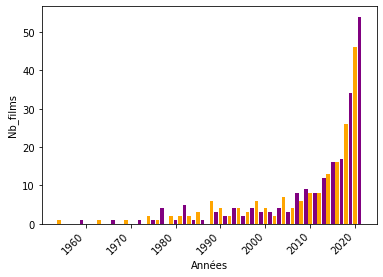

In [89]:
Pages.Year.value_counts() # Le graph ci-dessous montre graphiquement ce résultat


#Ici on sort la tête de l'eau
# Je passe en liste car j'avais un blocage

a = Pages['Year'].value_counts(sort=False)
a = a.tolist()
a

b = list(dict.fromkeys(Pages['Year'].sort_values(ascending=True)))
b

d = {'Year':b,'nb_film':a}
d

df = pd.DataFrame(d)
df # Attention pas le bon truc

# Graph
color = ["orange"]*1 + ["purple"]*1 # un sur deux en violet et autre en orange pour bien distinguer les années
plt.bar(b,a, color = color, align='center') 
plt.xlabel('Années')
plt.xticks(rotation=45, ha="right") # Rotation de l'axis x
plt.ylabel('Nb_films')

plt.show()

   mois  counts
0    01      40
9    02      28
1    03      37
2    04      35
4    05      35
11   06      22
6    07      32
5    08      33
10   09      26
8    10      28
7    11      31
3    12      35


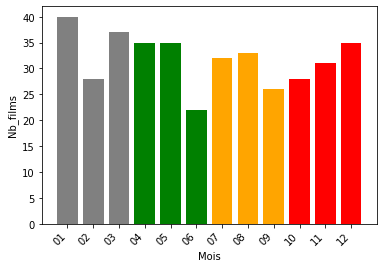

In [90]:
Pages.Mois_visu.value_counts()

P_mois = Pages['Mois_visu'].value_counts().rename_axis('mois').reset_index(name='counts').sort_values('mois')
print (P_mois)


# Graph
color = ["grey"]*3 + ["green"]*3 + ["orange"]*3 + ["red"]*3 # Couleur selon trimestre
plt.bar(P_mois['mois'],P_mois['counts'], color = color, align='center') 
plt.xlabel('Mois')
plt.xticks(rotation=45, ha="right") # Rotation de l'axis x
plt.ylabel('Nb_films')

plt.show()

   tranche  counts
7   1950's       2
6   1960's       3
5   1970's      11
4   1980's      24
3   1990's      34
2   2000's      50
0   2010's     158
1  2020's'     100


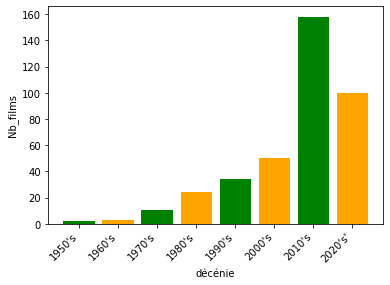

In [91]:
Pages.Tranche.value_counts()

P_tranche = Pages['Tranche'].value_counts().rename_axis('tranche').reset_index(name='counts').sort_values('tranche')
print (P_tranche)


# Graph
color = ["green"]*1 + ["orange"]*1 # Couleur 1 sur 2
plt.bar(P_tranche['tranche'],P_tranche['counts'], color = color, align='center') 
plt.xlabel('décénie')
plt.xticks(rotation=45, ha="right") # Rotation de l'axis x
plt.ylabel('Nb_films')

plt.show()

In [92]:
Pages['Temps'].sum() # 40156 minutes

Pages['Temps'].sum() /60 # Environ 669 heures

Pages['Temps'].sum() /60 /24 # Environ 28 jours

27.8875

In [93]:
Pages['Temps'].mean() # 40156 minutes

105.12565445026178